# Auto-Complete System - Exploratory Data Analysis

**Interactive exploration of datasets for the hackathon project**

This notebook provides comprehensive EDA with visualizations for:
- Training data (prefix-query pairs)
- Query pool (candidate queries)
- Query features (popularity metrics)
- Test prefixes

## Setup and Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 1. Load All Datasets

In [4]:
# !pip install datasets

In [5]:
from datasets import load_dataset

# Loading the Data from Hugging Face Hub
train_data = load_dataset("123tushar/Dice_Challenge_2025", data_files="train_data/*.parquet")
test_prefixes_data = load_dataset("123tushar/Dice_Challenge_2025", data_files="test_prefixes_data/*.parquet")
query_features = load_dataset("123tushar/Dice_Challenge_2025", data_files="query_features/*.parquet")
pool = load_dataset("123tushar/Dice_Challenge_2025", data_files="pool/*.parquet")

# Reading the Data to pandas DF - using the correct variable names
train_df = train_data['train'].to_pandas()
test_prefixes_df = test_prefixes_data['train'].to_pandas()
query_features_df = query_features['train'].to_pandas()
query_pool_df = pool['train'].to_pandas()

print("✓ All datasets loaded successfully from Hugging Face!")
print(f"\n  Train data: {train_df.shape}")
print(f"  Test prefixes: {test_prefixes_df.shape}")
print(f"  Query features: {query_features_df.shape}")
print(f"  Query pool: {query_pool_df.shape}")


✓ All datasets loaded successfully from Hugging Face!

  Train data: (6183540, 2)
  Test prefixes: (522726, 1)
  Query features: (5339026, 5)
  Query pool: (4168668, 1)


## 2. Training Data Analysis

In [6]:
print("TRAINING DATA OVERVIEW")
print("="*80)
print(f"\nShape: {train_df.shape}")
print(f"Columns: {train_df.columns.tolist()}")
print(f"\nData types:")
print(train_df.dtypes)
# prit the first 5 rows of the dataframe
print(f"\nFirst 5 rows:\n{train_df.head()}")

TRAINING DATA OVERVIEW

Shape: (6183540, 2)
Columns: ['prefix', 'query']

Data types:
prefix    object
query     object
dtype: object

First 5 rows:
              prefix                         query
0        5 meter cot       1 5 meter cotton fabric
1  1 litre oil bottl            1 litre oil bottle
2          1 eeyar g            1 year boy punjabi
3          1 eeyar g  1 year girl baby accessories
4       girl night d      10 years girl nightdress


In [7]:
# Basic statistics
print("\nFirst 10 rows:")
train_df.head(10)


First 10 rows:


,prefix,query
0,5 meter cot,1 5 meter cotton fabric
1,1 litre oil bottl,1 litre oil bottle
2,1 eeyar g,1 year boy punjabi
3,1 eeyar g,1 year girl baby accessories
4,girl night d,10 years girl nightdress
5,years girl nig,10 years girl nightdress
6,volt led,12 volt led bulb
7,volt led,12 volt led light car
8,volt led,12 volt led light home
9,13 yearz,13 years boys watch


In [8]:
# Unique values
print("\nUnique values:")
if 'prefix' in train_df.columns:
    print(f"  Unique prefixes: {train_df['prefix'].nunique():,}")
if 'query' in train_df.columns:
    print(f"  Unique queries: {train_df['query'].nunique():,}")
    
# Null values
print("\nMissing values:")
print(train_df.isnull().sum())


Unique values:
  Unique prefixes: 800,000
  Unique queries: 1,347,910

Missing values:
prefix    0
query     0
dtype: int64


### Training Data Visualizations

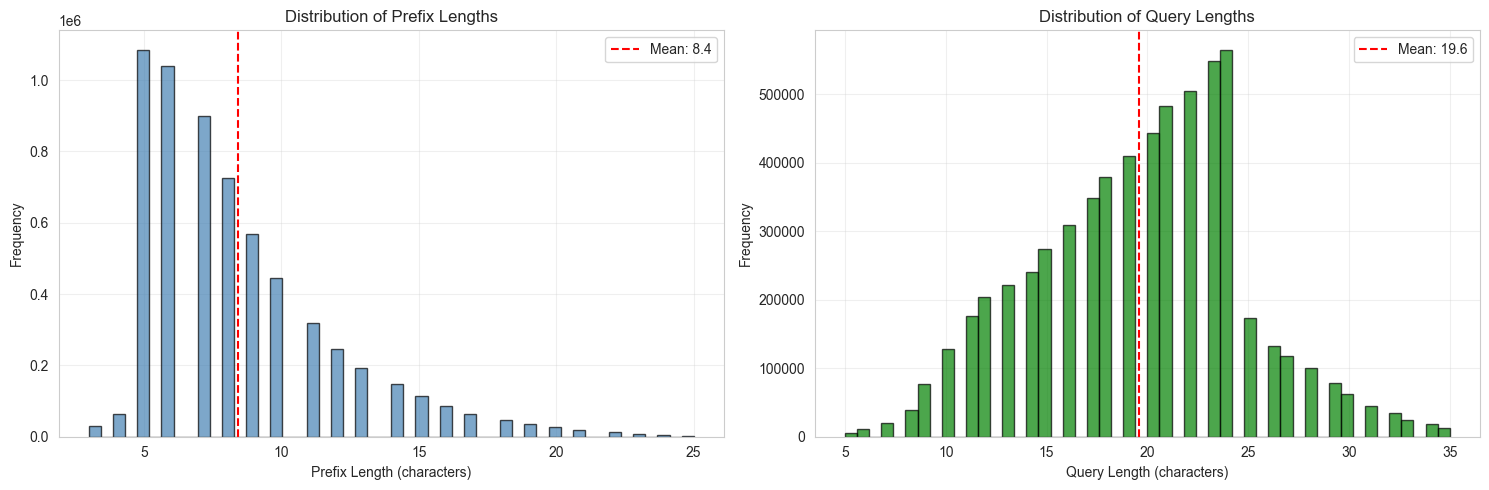


Prefix Length Stats: Mean=8.4, Median=7.0, Min=3, Max=25
Query Length Stats: Mean=19.6, Median=20.0, Min=5, Max=35


In [9]:
# Length distributions
if 'prefix' in train_df.columns and 'query' in train_df.columns:
    train_df['prefix_length'] = train_df['prefix'].str.len()
    train_df['query_length'] = train_df['query'].str.len()
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Prefix length distribution
    axes[0].hist(train_df['prefix_length'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0].set_xlabel('Prefix Length (characters)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Distribution of Prefix Lengths')
    axes[0].axvline(train_df['prefix_length'].mean(), color='red', linestyle='--', 
                    label=f'Mean: {train_df["prefix_length"].mean():.1f}')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Query length distribution
    axes[1].hist(train_df['query_length'], bins=50, edgecolor='black', alpha=0.7, color='green')
    axes[1].set_xlabel('Query Length (characters)')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Distribution of Query Lengths')
    axes[1].axvline(train_df['query_length'].mean(), color='red', linestyle='--',
                    label=f'Mean: {train_df["query_length"].mean():.1f}')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nPrefix Length Stats: Mean={train_df['prefix_length'].mean():.1f}, "
          f"Median={train_df['prefix_length'].median():.1f}, "
          f"Min={train_df['prefix_length'].min()}, "
          f"Max={train_df['prefix_length'].max()}")
    print(f"Query Length Stats: Mean={train_df['query_length'].mean():.1f}, "
          f"Median={train_df['query_length'].median():.1f}, "
          f"Min={train_df['query_length'].min()}, "
          f"Max={train_df['query_length'].max()}")

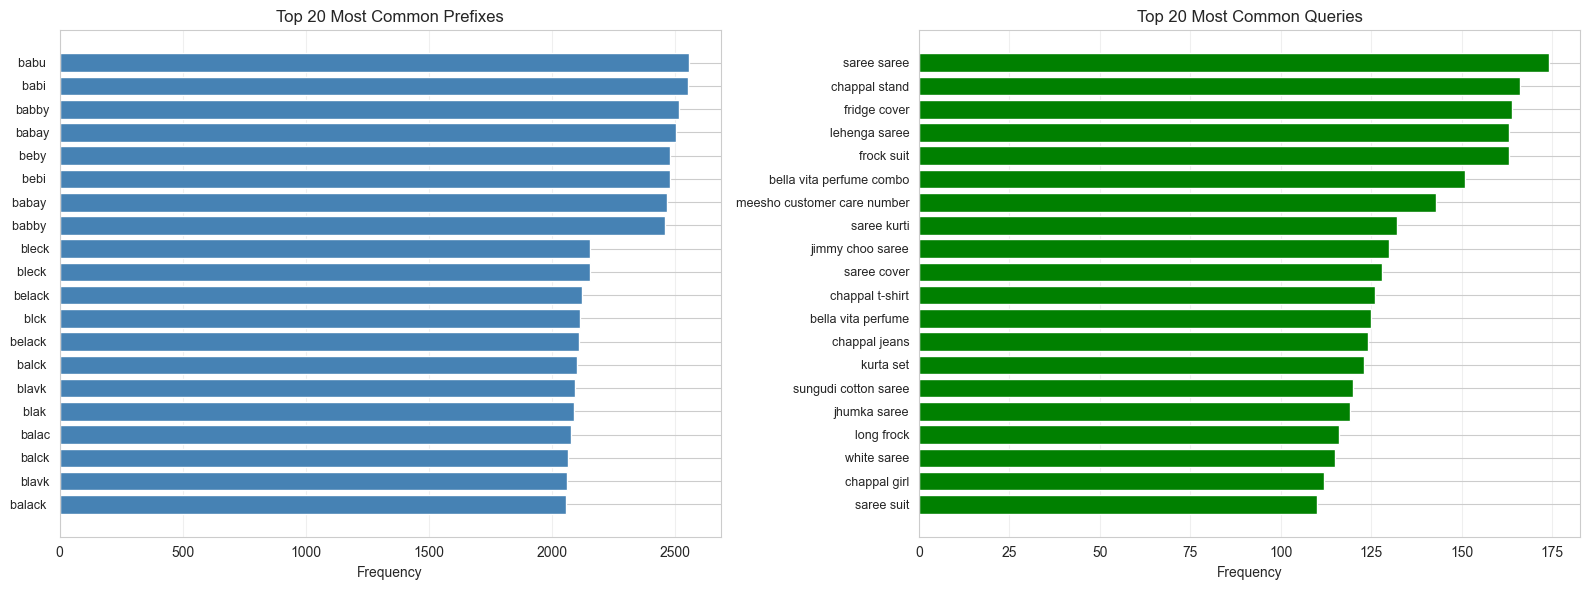

In [10]:
# Most common prefixes and queries
if 'prefix' in train_df.columns and 'query' in train_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Top 20 prefixes
    top_prefixes = train_df['prefix'].value_counts().head(20)
    axes[0].barh(range(len(top_prefixes)), top_prefixes.values, color='steelblue')
    axes[0].set_yticks(range(len(top_prefixes)))
    axes[0].set_yticklabels(top_prefixes.index, fontsize=9)
    axes[0].set_xlabel('Frequency')
    axes[0].set_title('Top 20 Most Common Prefixes')
    axes[0].invert_yaxis()
    axes[0].grid(True, alpha=0.3, axis='x')
    
    # Top 20 queries
    top_queries = train_df['query'].value_counts().head(20)
    axes[1].barh(range(len(top_queries)), top_queries.values, color='green')
    axes[1].set_yticks(range(len(top_queries)))
    axes[1].set_yticklabels(top_queries.index, fontsize=9)
    axes[1].set_xlabel('Frequency')
    axes[1].set_title('Top 20 Most Common Queries')
    axes[1].invert_yaxis()
    axes[1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()

## 3. Query Pool Analysis

In [12]:
print("="*80)
print("QUERY POOL OVERVIEW")
print("="*80)
print(f"\nShape: {query_pool_df.shape}")
print(f"Columns: {query_pool_df.columns.tolist()}")
print(f"\nFirst 10 queries:")
query_pool_df.head(10)

QUERY POOL OVERVIEW

Shape: (4168668, 1)
Columns: ['query']

First 10 queries:


,query
0,garba nosepin
1,jeans top girl 10
2,350 kurta set
3,file folder
4,green color ka kurta salwar
5,gym cloth woman
6,jewelry
7,7 years girl school bag
8,trendy tshirt for women
9,night shadow galaxy lamp



Unique queries in pool: 4,168,668

Query length statistics:
count    4.168668e+06
mean     1.883296e+01
std      6.481715e+00
min      5.000000e+00
25%      1.400000e+01
50%      1.900000e+01
75%      2.400000e+01
max      3.500000e+01
Name: query_length, dtype: float64


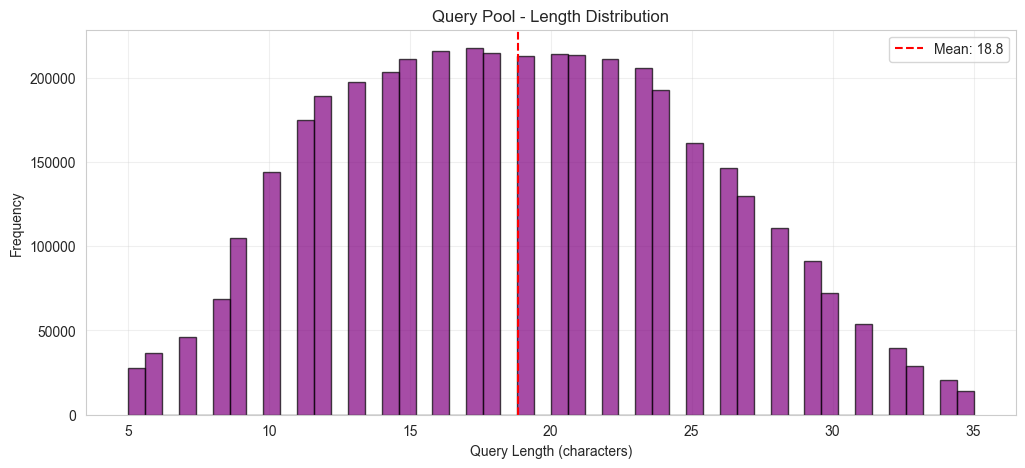

In [13]:
# Query pool statistics
if 'query' in query_pool_df.columns:
    query_pool_df['query_length'] = query_pool_df['query'].str.len()
    
    print(f"\nUnique queries in pool: {query_pool_df['query'].nunique():,}")
    print(f"\nQuery length statistics:")
    print(query_pool_df['query_length'].describe())
    
    # Visualize query length distribution
    plt.figure(figsize=(12, 5))
    plt.hist(query_pool_df['query_length'], bins=50, edgecolor='black', alpha=0.7, color='purple')
    plt.xlabel('Query Length (characters)')
    plt.ylabel('Frequency')
    plt.title('Query Pool - Length Distribution')
    plt.axvline(query_pool_df['query_length'].mean(), color='red', linestyle='--',
                label=f'Mean: {query_pool_df["query_length"].mean():.1f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

## 4. Query Features Analysis

In [14]:
print("QUERY FEATURES OVERVIEW")
print("="*80)
print(f"\nShape: {query_features_df.shape}")
print(f"Columns: {query_features_df.columns.tolist()}")
print(f"\nFirst 10 rows:")
query_features_df.head(10)

QUERY FEATURES OVERVIEW

Shape: (5339026, 5)
Columns: ['query', 'catalog_clicks', 'orders', 'volume', 'catalog_views']

First 10 rows:


,query,catalog_clicks,orders,volume,catalog_views
0,0 baby girl,50.0,2.0,42.0,1796.0
1,0 bacchon ki gadi,5.0,NaN,8.0,42.0
2,0 bulb,575.0,13.0,553.0,20724.0
3,0 garba dress,NaN,NaN,7.0,52.0
4,0 makeup box,5.0,NaN,15.0,287.0
5,0 no size laddu gopal kangan,NaN,NaN,9.0,26.0
6,0 saiz baby dungaree,12.0,NaN,7.0,188.0
7,0 size baby girl set,15.0,NaN,11.0,412.0
8,0 size boy sweater,29.0,2.0,23.0,686.0
9,0 size chandrika,28.0,NaN,16.0,473.0


In [15]:
# Feature statistics
print("\nFeature Statistics:")
query_features_df.describe()


Feature Statistics:


,catalog_clicks,orders,volume,catalog_views
count,4.375265e+06,1.261404e+06,4.949826e+06,4.706028e+06
mean,5.805115e+02,3.222615e+01,4.701210e+02,1.830805e+04
std,2.457825e+04,5.214309e+02,2.022805e+04,8.650912e+05
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,4.000000e+00,1.000000e+00,7.000000e+00,1.460000e+02
50%,1.100000e+01,3.000000e+00,1.200000e+01,3.830000e+02
75%,4.400000e+01,1.000000e+01,3.800000e+01,1.466000e+03
max,2.951075e+07,1.891730e+05,2.250576e+07,1.070281e+09


In [16]:
# Visualize feature distributions
feature_cols = [col for col in query_features_df.columns if col != 'query']

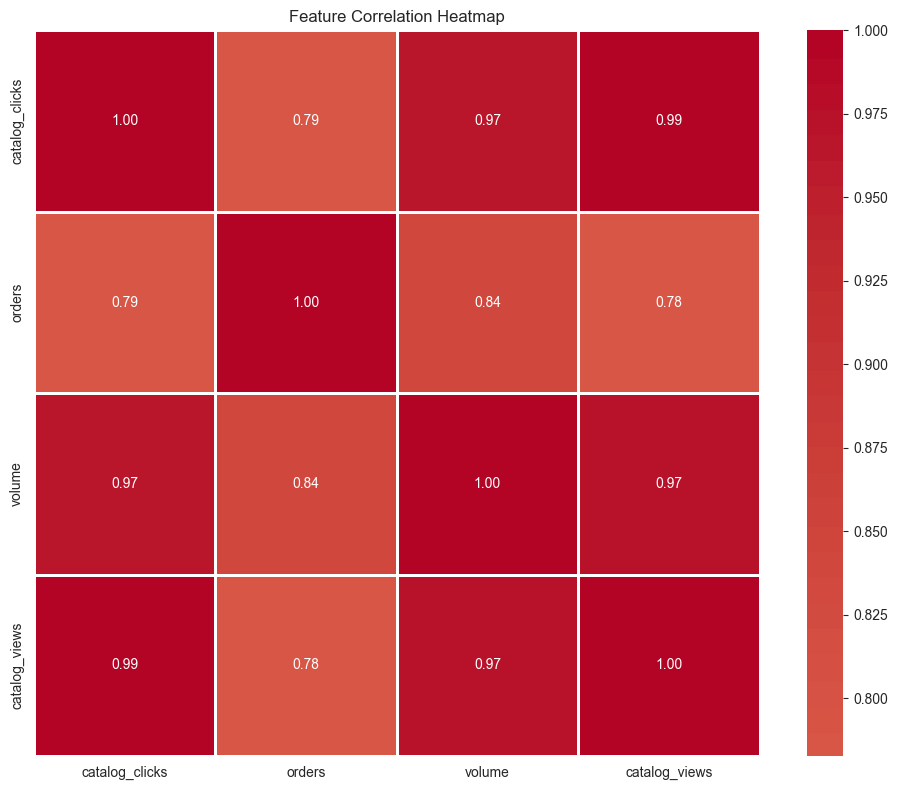

In [17]:
# Feature correlation heatmap
if len(feature_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = query_features_df[feature_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1)
    plt.title('Feature Correlation Heatmap')
    plt.tight_layout()
    plt.show()


Top 20 queries by catalog_clicks:


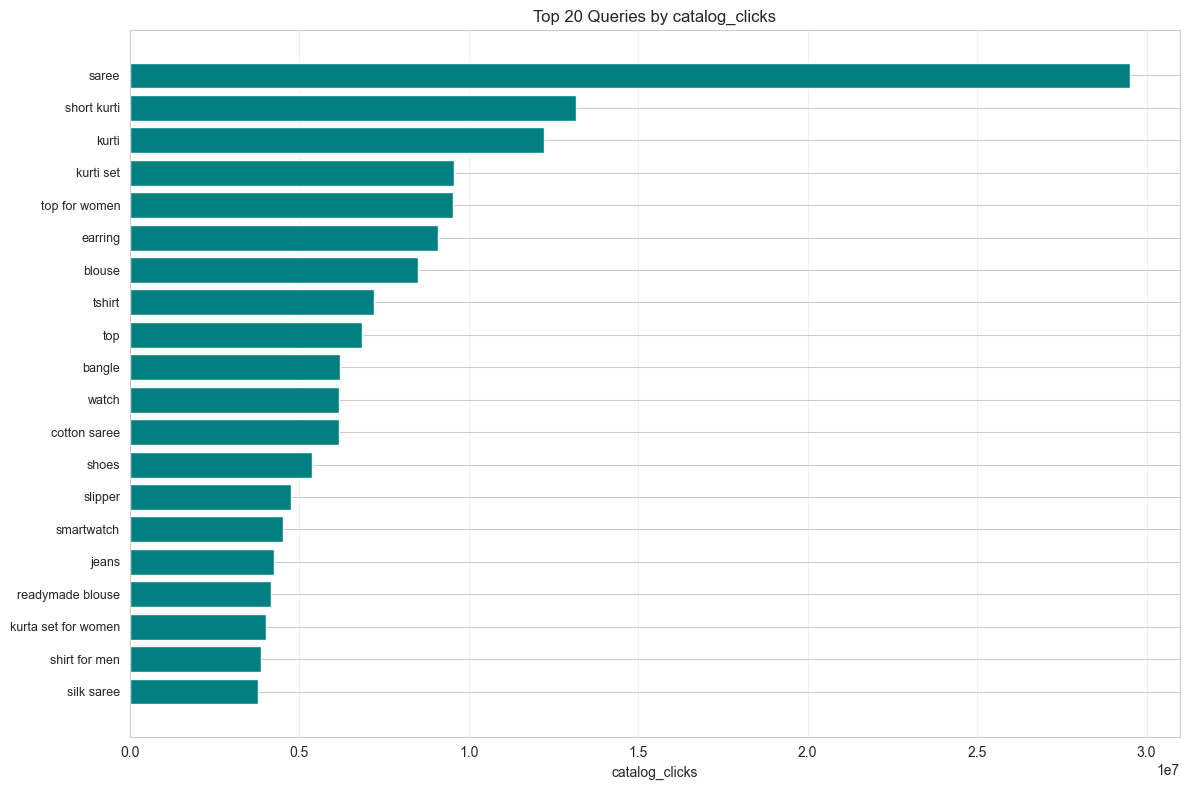

In [18]:
# Top queries by popularity features
if len(feature_cols) > 0:
    primary_feature = feature_cols[0]  # Use first feature (e.g., 'orders')
    
    print(f"\nTop 20 queries by {primary_feature}:")
    top_queries_by_feature = query_features_df.nlargest(20, primary_feature)
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(top_queries_by_feature)), 
             top_queries_by_feature[primary_feature].values,
             color='teal')
    plt.yticks(range(len(top_queries_by_feature)), 
               top_queries_by_feature['query'].values, fontsize=9)
    plt.xlabel(primary_feature)
    plt.title(f'Top 20 Queries by {primary_feature}')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()

## 5. Test Prefixes Analysis

In [19]:
print("="*80)
print("TEST PREFIXES OVERVIEW")
print("="*80)
print(f"\nShape: {test_prefixes_df.shape}")
print(f"Columns: {test_prefixes_df.columns.tolist()}")
print(f"\nFirst 20 test prefixes:")
test_prefixes_df.head(20)

TEST PREFIXES OVERVIEW

Shape: (522726, 1)
Columns: ['prefix']

First 20 test prefixes:


,prefix
0,full sleeve mehendi st
1,dancing jea
2,vridavan dress
3,lucifer w
4,parryware
5,suzume
6,heavy readymad
7,night fall
8,orange color su
9,mars moisturize



Total test prefixes: 522,726
Unique test prefixes: 522,726

Test prefix length statistics:
count    522726.000000
mean         13.593171
std           4.705526
min           3.000000
25%          10.000000
50%          14.000000
75%          17.000000
max          25.000000
Name: prefix, dtype: float64


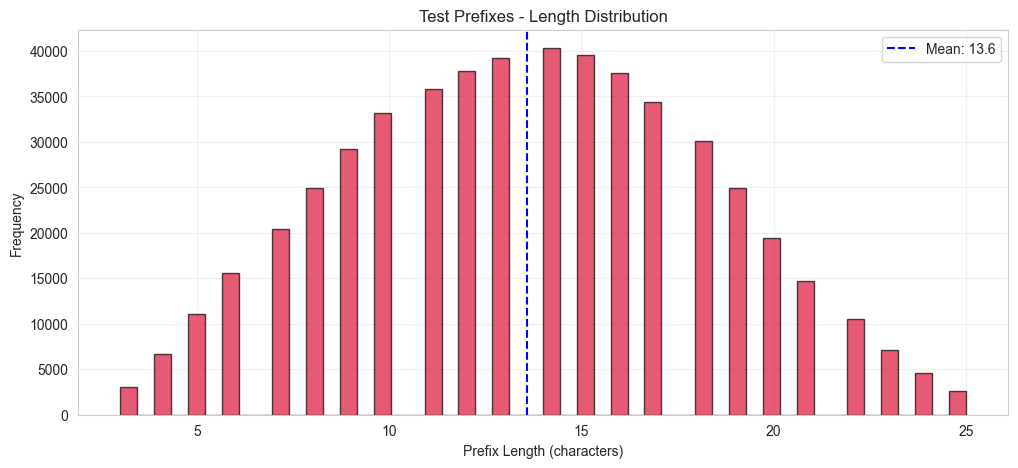

In [20]:
# Test prefix statistics
prefix_col = test_prefixes_df.columns[0]
test_prefixes = test_prefixes_df[prefix_col]

print(f"\nTotal test prefixes: {len(test_prefixes):,}")
print(f"Unique test prefixes: {test_prefixes.nunique():,}")

# Length distribution
test_prefix_lengths = test_prefixes.str.len()

print(f"\nTest prefix length statistics:")
print(test_prefix_lengths.describe())

# Visualize
plt.figure(figsize=(12, 5))
plt.hist(test_prefix_lengths, bins=50, edgecolor='black', alpha=0.7, color='crimson')
plt.xlabel('Prefix Length (characters)')
plt.ylabel('Frequency')
plt.title('Test Prefixes - Length Distribution')
plt.axvline(test_prefix_lengths.mean(), color='blue', linestyle='--',
            label=f'Mean: {test_prefix_lengths.mean():.1f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 6. Merge Query Features with Query Pool

In [21]:
# Merge query features onto query pool
print("Merging query features with query pool...\n")

enriched_query_pool = query_pool_df.merge(
    query_features_df,
    on='query',
    how='left'
)

print(f"Original query pool shape: {query_pool_df.shape}")
print(f"Enriched query pool shape: {enriched_query_pool.shape}")
print(f"\nFirst 10 rows of enriched query pool:")
enriched_query_pool.head(10)

Merging query features with query pool...

Original query pool shape: (4168668, 2)
Enriched query pool shape: (4168668, 6)

First 10 rows of enriched query pool:


,query,query_length,catalog_clicks,orders,volume,catalog_views
0,garba nosepin,13,10132.0,298.0,10281.0,343888.0
1,jeans top girl 10,17,2316.0,23.0,1658.0,71223.0
2,350 kurta set,13,725.0,2.0,563.0,24592.0
3,file folder,11,33249.0,875.0,27430.0,807563.0
4,green color ka kurta salwar,27,225.0,NaN,149.0,8947.0
5,gym cloth woman,15,10751.0,124.0,8190.0,320139.0
6,jewelry,7,166995.0,849.0,170675.0,8105389.0
7,7 years girl school bag,23,827.0,25.0,592.0,21765.0
8,trendy tshirt for women,23,6667.0,63.0,5469.0,292675.0
9,night shadow galaxy lamp,24,54.0,NaN,72.0,2252.0



Merge success rate: 3,651,173 / 4,168,668 (87.59%)


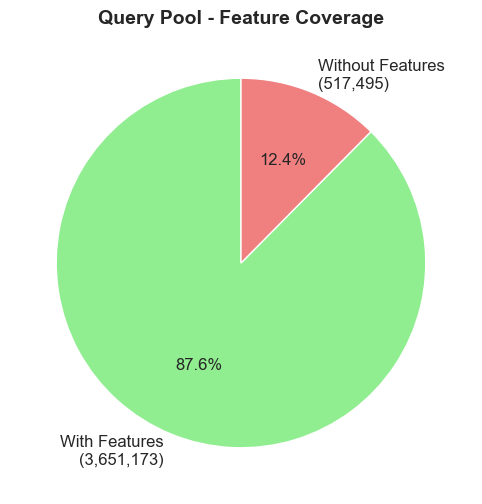

In [24]:
# Check merge success
feature_cols = [col for col in query_features_df.columns if col != 'query']
if len(feature_cols) > 0:
    primary_feature = feature_cols[0]
    matched = enriched_query_pool[primary_feature].notna().sum()
    total = len(enriched_query_pool)
    
    print(f"\nMerge success rate: {matched:,} / {total:,} ({100*matched/total:.2f}%)")
    
    # Visualize
    fig, ax = plt.subplots(figsize=(8, 6))
    sizes = [matched, total - matched]
    labels = [f'With Features\n({matched:,})', f'Without Features\n({total-matched:,})']
    colors = ['lightgreen', 'lightcoral']
    
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
           startangle=90, textprops={'fontsize': 12})
    ax.set_title('Query Pool - Feature Coverage', fontsize=14, fontweight='bold')
    plt.show()

## 7. Character N-gram Analysis

Total trigrams analyzed: 15,899
Unique trigrams: 3,371

Top 30 most common trigrams:


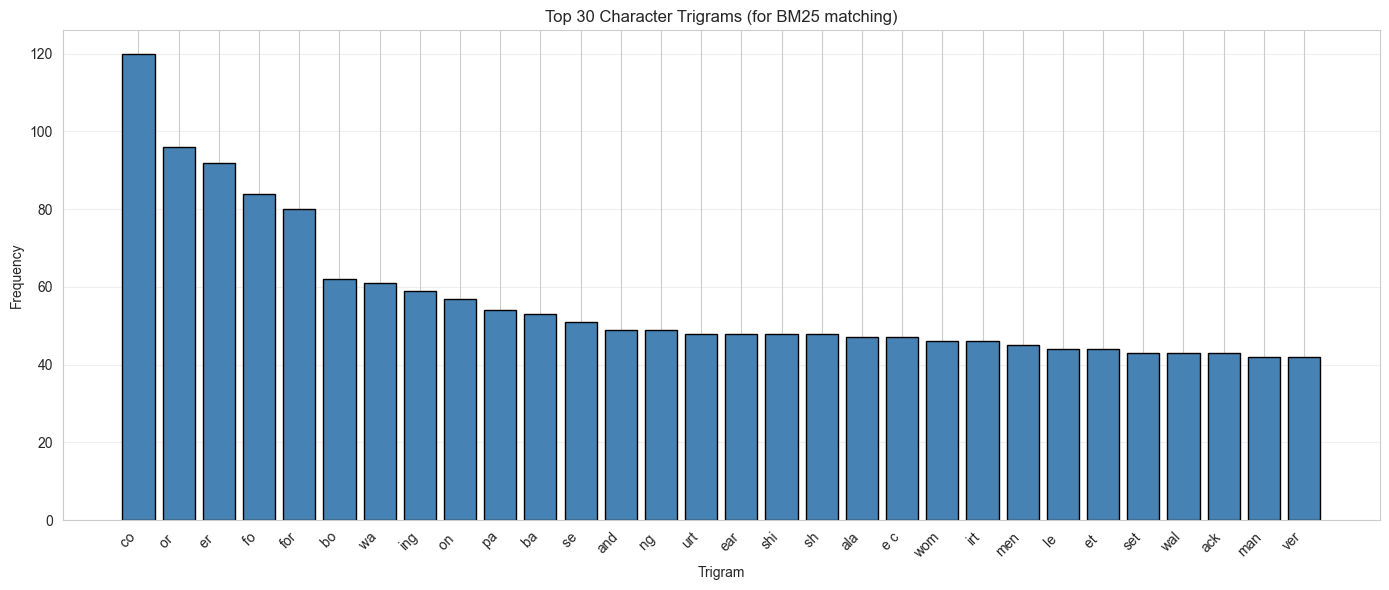

In [22]:
# Analyze character n-grams (trigrams)
def generate_trigrams(text):
    """Generate character trigrams from text."""
    if not isinstance(text, str) or len(text) < 3:
        return []
    return [text[i:i+3] for i in range(len(text) - 2)]

# Sample analysis on first 1000 queries
sample_queries = query_pool_df['query'].head(1000) if 'query' in query_pool_df.columns else []

if len(sample_queries) > 0:
    all_trigrams = []
    for query in sample_queries:
        all_trigrams.extend(generate_trigrams(query.lower()))
    
    trigram_counts = Counter(all_trigrams)
    top_trigrams = trigram_counts.most_common(30)
    
    print(f"Total trigrams analyzed: {len(all_trigrams):,}")
    print(f"Unique trigrams: {len(trigram_counts):,}")
    print(f"\nTop 30 most common trigrams:")
    
    # Visualize
    trigrams, counts = zip(*top_trigrams)
    
    plt.figure(figsize=(14, 6))
    plt.bar(range(len(trigrams)), counts, color='steelblue', edgecolor='black')
    plt.xticks(range(len(trigrams)), trigrams, rotation=45, ha='right')
    plt.xlabel('Trigram')
    plt.ylabel('Frequency')
    plt.title('Top 30 Character Trigrams (for BM25 matching)')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

## 8. Prefix-Query Relationship Analysis

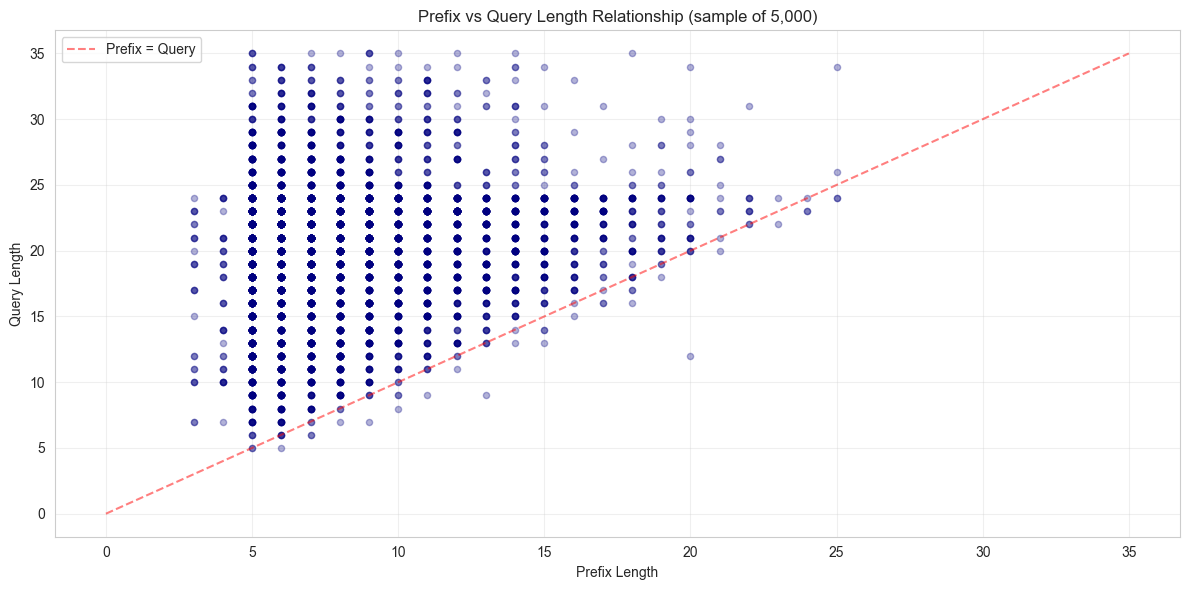


Correlation between prefix and query length: 0.215


In [26]:
# Analyze relationship between prefix and query lengths
if 'prefix' in train_df.columns and 'query' in train_df.columns:
    sample_size = min(5000, len(train_df))
    sample_df = train_df.sample(n=sample_size, random_state=42)
    
    plt.figure(figsize=(12, 6))
    plt.scatter(sample_df['prefix_length'], sample_df['query_length'], 
                alpha=0.3, s=20, color='navy')
    plt.xlabel('Prefix Length')
    plt.ylabel('Query Length')
    plt.title(f'Prefix vs Query Length Relationship (sample of {sample_size:,})')
    plt.grid(True, alpha=0.3)
    
    # Add diagonal line (prefix = query)
    max_len = max(sample_df['prefix_length'].max(), sample_df['query_length'].max())
    plt.plot([0, max_len], [0, max_len], 'r--', alpha=0.5, label='Prefix = Query')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Calculate correlation
    corr = sample_df['prefix_length'].corr(sample_df['query_length'])
    print(f"\nCorrelation between prefix and query length: {corr:.3f}")

## 9. Summary Statistics

In [23]:
print("="*80)
print("SUMMARY STATISTICS")
print("="*80)

print(f"\n Dataset Sizes:")
print(f"  • Training examples: {len(train_df):,}")
print(f"  • Query pool size: {len(query_pool_df):,}")
print(f"  • Queries with features: {len(query_features_df):,}")
print(f"  • Test prefixes: {len(test_prefixes_df):,}")

if 'prefix' in train_df.columns and 'query' in train_df.columns:
    print(f"\n Unique Values:")
    print(f"  • Unique training prefixes: {train_df['prefix'].nunique():,}")
    print(f"  • Unique training queries: {train_df['query'].nunique():,}")
    print(f"  • Unique query pool queries: {query_pool_df['query'].nunique():,}")
if len(feature_cols) > 0:
    print(f"\n Feature Information:")
    print(f"  • Number of features: {len(feature_cols)}")
    print(f"  • Feature names: {feature_cols}")


SUMMARY STATISTICS

 Dataset Sizes:
  • Training examples: 6,183,540
  • Query pool size: 4,168,668
  • Queries with features: 5,339,026
  • Test prefixes: 522,726

 Unique Values:
  • Unique training prefixes: 800,000
  • Unique training queries: 1,347,910
  • Unique query pool queries: 4,168,668

 Feature Information:
  • Number of features: 4
  • Feature names: ['catalog_clicks', 'orders', 'volume', 'catalog_views']


## 💡 10. Key Insights and Recommendations

In [28]:
print("="*80)
print("KEY INSIGHTS")
print("="*80)

insights = []

if 'prefix' in train_df.columns and 'query' in train_df.columns:
    avg_ratio = train_df['prefix_length'].mean() / train_df['query_length'].mean()
    if avg_ratio < 0.5:
        insights.append("✓ Prefixes are significantly shorter than queries - good for auto-complete")
    
    if train_df['prefix'].nunique() < len(train_df) * 0.8:
        insights.append("✓ Many prefixes appear multiple times - good training signal")
    
    if train_df['query'].nunique() < len(train_df) * 0.8:
        insights.append("✓ Popular queries appear frequently - leverage popularity features")

if len(feature_cols) > 0 and 'query' in enriched_query_pool.columns:
    coverage = enriched_query_pool[feature_cols[0]].notna().sum() / len(enriched_query_pool)
    if coverage > 0.8:
        insights.append("✓ High feature coverage - popularity signals will be useful")
    else:
        insights.append("⚠ Low feature coverage - may need feature imputation")

if len(query_pool_df) > 10000:
    insights.append("✓ Large query pool - semantic search (FAISS) will be beneficial")

for i, insight in enumerate(insights, 1):
    print(f"\n{i}. {insight}")

print("\n" + "="*80)
print("RECOMMENDATIONS")
print("="*80)

print("\n1. Use BM25 with character trigrams for typo-resistant matching")
print("2. Use Sentence-BERT for semantic similarity")
print("3. Leverage popularity features (orders, volume, etc.) in re-ranking")
print("4. Train LightGBM to learn optimal combination of signals")
print("5. Consider prefix length as a feature in the model")
print("6. Monitor for data quality issues (nulls, duplicates)")

print("\n✓ Ready to proceed with model training!")

KEY INSIGHTS

1. ✓ Prefixes are significantly shorter than queries - good for auto-complete

2. ✓ Many prefixes appear multiple times - good training signal

3. ✓ Popular queries appear frequently - leverage popularity features

4. ✓ High feature coverage - popularity signals will be useful

5. ✓ Large query pool - semantic search (FAISS) will be beneficial

RECOMMENDATIONS

1. Use BM25 with character trigrams for typo-resistant matching
2. Use Sentence-BERT for semantic similarity
3. Leverage popularity features (orders, volume, etc.) in re-ranking
4. Train LightGBM to learn optimal combination of signals
5. Consider prefix length as a feature in the model
6. Monitor for data quality issues (nulls, duplicates)

✓ Ready to proceed with model training!

1. ✓ Prefixes are significantly shorter than queries - good for auto-complete

2. ✓ Many prefixes appear multiple times - good training signal

3. ✓ Popular queries appear frequently - leverage popularity features

4. ✓ High feature cove

## 💾 11. Save Enriched Query Pool (Optional)

In [29]:
# Optionally save the enriched query pool for later use
# enriched_query_pool.to_parquet('enriched_query_pool.parquet', index=False)
# print("✓ Enriched query pool saved to 'enriched_query_pool.parquet'")

print("\n✓ EDA notebook complete!")
print("\nNext steps:")
print("  1. Review the visualizations and insights above")
print("  2. Run: python create_reranking_dataset.py")
print("  3. Run: python train_reranking_model.py")
print("  4. Run: python generate_submission.py")


✓ EDA notebook complete!

Next steps:
  1. Review the visualizations and insights above
  2. Run: python create_reranking_dataset.py
  3. Run: python train_reranking_model.py
  4. Run: python generate_submission.py


## 🎯 WHAT IS THIS DATA? - QUICK SUMMARY

### You're Building: **E-commerce Search Autocomplete for Meesho**

**Real-world scenario:**
- User types: `"dres"` (typo + incomplete)
- Your system suggests: `"dress for women"`, `"dresses"`, `"dress for party"`

---

### Your Data:

| Dataset | Size | What It Is | Example |
|---------|------|-----------|---------|
| **Training** | 6.2M pairs | User input → What they meant | `"sho"` → `"shoes"` |
| **Query Pool** | 4.2M queries | All possible completions | `"shoes for men"` |
| **Features** | 5.3M queries | Popularity metrics | orders, clicks, views |
| **Test** | 522K prefixes | What to predict | `"full sleeve mehendi st"` |

---

### Key Insights:

1. **Users are lazy:** Avg prefix = 8.4 chars vs Avg query = 19.6 chars (43%)
2. **Lots of typos:** Need character-level matching
3. **Huge search space:** 4.2M possible queries!
4. **Business matters:** Popular queries should rank higher
5. **Mixed language:** English + Hinglish ("kurta", "ka", "wala")

---

### The Challenge:

For **each** test prefix (522K total), predict **top 150 queries** from 4.2M possibilities!

**That's 2.2 TRILLION potential combinations!** ⚡

---

### Your Solution (Already Built!):

1. **BM25 with character trigrams** → Handles typos ✓
2. **Sentence-BERT + FAISS** → Semantic search ✓
3. **LightGBM re-ranker** → Smart scoring ✓
4. **Popularity features** → Business-aware ✓

**Your approach is SOLID!** Ready to run! 🚀
